--------------------------------------------------------------
## **CASO DE NEGOCIO: PREDICCIÓN DE ABANDONO DE PERSONAL**
--------------------------------------------------------------

Fuente: MIT (2023). Employee attrition prediction, MIT Professional Education

---------------------
## **Context**
---------------------

McCurr Healthcare Consultancy es una multinacional que cuenta con miles de empleados repartidos por todo el mundo. La empresa cree en contratar a los mejores talentos disponibles y retenerlos durante el mayor tiempo posible. Se gasta una enorme cantidad de recursos en retener a los empleados existentes a través de diversas iniciativas. El director de operaciones de personal quiere **reducir el costo de retención de los empleados**. Para ello, propone limitar los incentivos solo a aquellos empleados que corren el riesgo de abando (attrition en inglés). Como expertos en business analytics recientemente contratado como consultor para el departamento de operaciones, se le ha pedido que identifique patrones en las características de los empleados que abandonan la organización. Además, debe utilizar esta información para predecir si un empleado corre el riesgo de abandono. Esta información se utilizará para orientarlos con incentivos.

----------------------
## **Objective**  
----------------------

* Identificar los diferentes factores que impulsan el abandono en la organización.
* Identificar factores determinantes que permitan predecir si un colaborador abandonará la empresa o no.

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **EmployeeNumber** - Identificador de empleado
* **Attrition** - Abandono ¿El empleado abandonó la empresa o no?. 1 o 0
* **Age** - Edad del empleado
* **BusinessTravel** - Compromisos de viaje por el trabajo
* **DailyRate** - Descripción de variable no disponible**
* **Department** - Departamento al que pertence el empleado
* **DistanceFromHome** - Distancia del trabajo al hogar (en Km)
* **Education** - Educación del empleado. 1-Inferior a la universidad, 2-Universitario, 3-Licenciatura, 4-Maestría, 5-Doctorado
* **EducationField** - Campo educativo
* **EnvironmentSatisfaction** - Satisfacción del ambiente laboral. 1-Bajo, 2-Medio, 3-Alto, 4 -Muy alto
* **Gender** - Género del empleado
* **HourlyRate** - Descripción de variable no disponible**
* **JobInvolvement** - Involucramiento laboral.  1-Bajo, 2-Medio, 3-Alto, 4 -Muy alto
* **JobLevel** - Nivel laboral (1 a 5)
* **JobRole** - Rol Laboral
* **JobSatisfaction** - Satisfaccción laboral. 1-Bajo, 2-Medio, 3-Alto, 4 -Muy alto
* **MaritalStatus** - Estado Civil
* **MonthlyIncome** - Salario
* **MonthlyRate** - Descripción de variable no disponible**
* **NumCompaniesWorked** - Número de empresas trabajadas
* **Over18** - Si el empleado es mayor de edad.
* **OverTime** - ¿El empleado realiza horas extra? Si - No.
* **PercentSalaryHike** - el aumento porcentual del salario del año pasado
* **PerformanceRating** - Desempeño laboral. 1-Bajo, 2-Bueno, 3-Excelente, 4-Sobresaliente
* **RelationshipSatisfaction** -Satisfacción con la relación laboral. -Bajo, 2-Medio, 3-Alto, 4 -Muy alto
* **StandardHours** - Horas estándar
* **StockOptionLevel** - Nivel de opciones sobre acciones de la empresa.
* **TotalWorkingYears** - Total de años trabajados
* **TrainingTimesLastYear** - Número de capacitaciones a las que asistió el año pasado
* **WorkLifeBalance** - Equilibrio entre vida laboral y personal. 1-Bajo, 2-Bueno, 3-Excelente, 4-Sobresaliente
* **YearsAtCompany** - Años en la empresa.
* **YearsInCurrentRole** - Años en puesto actual.
* **YearsSinceLastPromotion** - Años desde el último ascenso.
* **YearsWithCurrManager** - Años con director/manager actual.

**En el mundo real, no encontrará definiciones para algunas de sus variables. Parte del análisis consiste en averiguar qué podrían significar**.

## **Importar las librerias requeridas y el cargar los datos**

In [162]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Carga de datos**

In [163]:
#El dataset se carga desde repositorio en la nube-github
url = "https://raw.githubusercontent.com/CienciaDatosUDLA/Ciencia-de-Datos/main/HR_Employee_Attrition_Dataset.xlsx"
df = pd.read_excel(url)

In [164]:
#descripción de primeras filas de la base de datos en excel
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### **Revisar información de los datos**

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observaciones:**

- Hay **2940 observaciones y 34 columnas** en los datos.
- Todas las columnas tienen 2940 valores no nulos, es decir, no hay **valores faltantes** en los datos.

**Comprobemos la cantidad de valores únicos en cada columna.**

In [93]:
# cantidad de valores únicos en cada columna
df.nunique()

,0
EmployeeNumber,2940
Attrition,2
Age,43
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4


**Observaciones:**

- El número de empleado es un identificador único para cada empleado. Podemos omitir esta columna, ya que no agregaría ningún valor a nuestro análisis.
- Over18 y StandardHours tienen solo un valor único. Podemos omitir estas columnas, ya que no agregarán ningún valor a nuestro análisis.
- En función de la cantidad de valores únicos en cada columna y la descripción de los datos, podemos identificar las columnas continuas y categóricas en los datos.

Omitimos las columnas mencionadas anteriormente y definimos listas para columnas numéricas y categóricas para explorarlas por separado.

In [165]:
# Eliminar columnas innecesarias
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis = 1)

In [166]:
# Crear columna numérica
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
          'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate',
          'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']

# Crear columna categórica
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction',
            'EnvironmentSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement',
            'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

## **ANÁLISIS EXPLORATORIO DE DATOS O ANALÍTICA DESCRIPTIVA**

---

> En esta sección se realiza un diagnóstico de la problemática (abandono de personal) utilizando gráficos univariados (una sola variable) y bivariado-multivariado (entre dos variables) para ara variables numéricas y categóricas



### **Análisis univariado de variables numéricas**

In [96]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


**Observaciones:**

- **La edad promedio de los empleados es de alrededor de 37 años**. Tiene un rango alto, de 18 a 60 años, lo que indica una buena diversidad de edad en la organización.
- **Al menos el 50% de los empleados vive en un radio de 7 km** de la organización. Sin embargo, hay algunos valores extremos, dado que el valor máximo es de 29 km.
- **El salario mensual promedio de un empleado es de USD 6500.** Tiene un rango alto de valores de 1K-20K USD, lo cual es de esperar para la distribución de ingresos de cualquier organización. Hay una gran diferencia entre el valor del tercer cuartil (alrededor de USD 8400) y el valor máximo (casi USD 20000), lo que demuestra que **los que más ganan en la empresa tienen un ingreso desproporcionadamente grande** en comparación con el resto de los empleados. Nuevamente, esto es bastante común en la mayoría de las organizaciones.
- **El aumento salarial promedio de un empleado es de alrededor del 15 %.** Al menos el 50 % de los empleados obtuvo un aumento salarial del 14 % o menos, y el aumento salarial máximo es del 25 %.
- El número promedio de años que un empleado está asociado a la empresa es de 7.
- **En promedio, el número de años desde que un empleado obtuvo un ascenso es de ~2,19**. La mayoría de los empleados han sido ascendidos desde el último año.

Exploremos estas variables con más profundidad observando sus distribuciones.

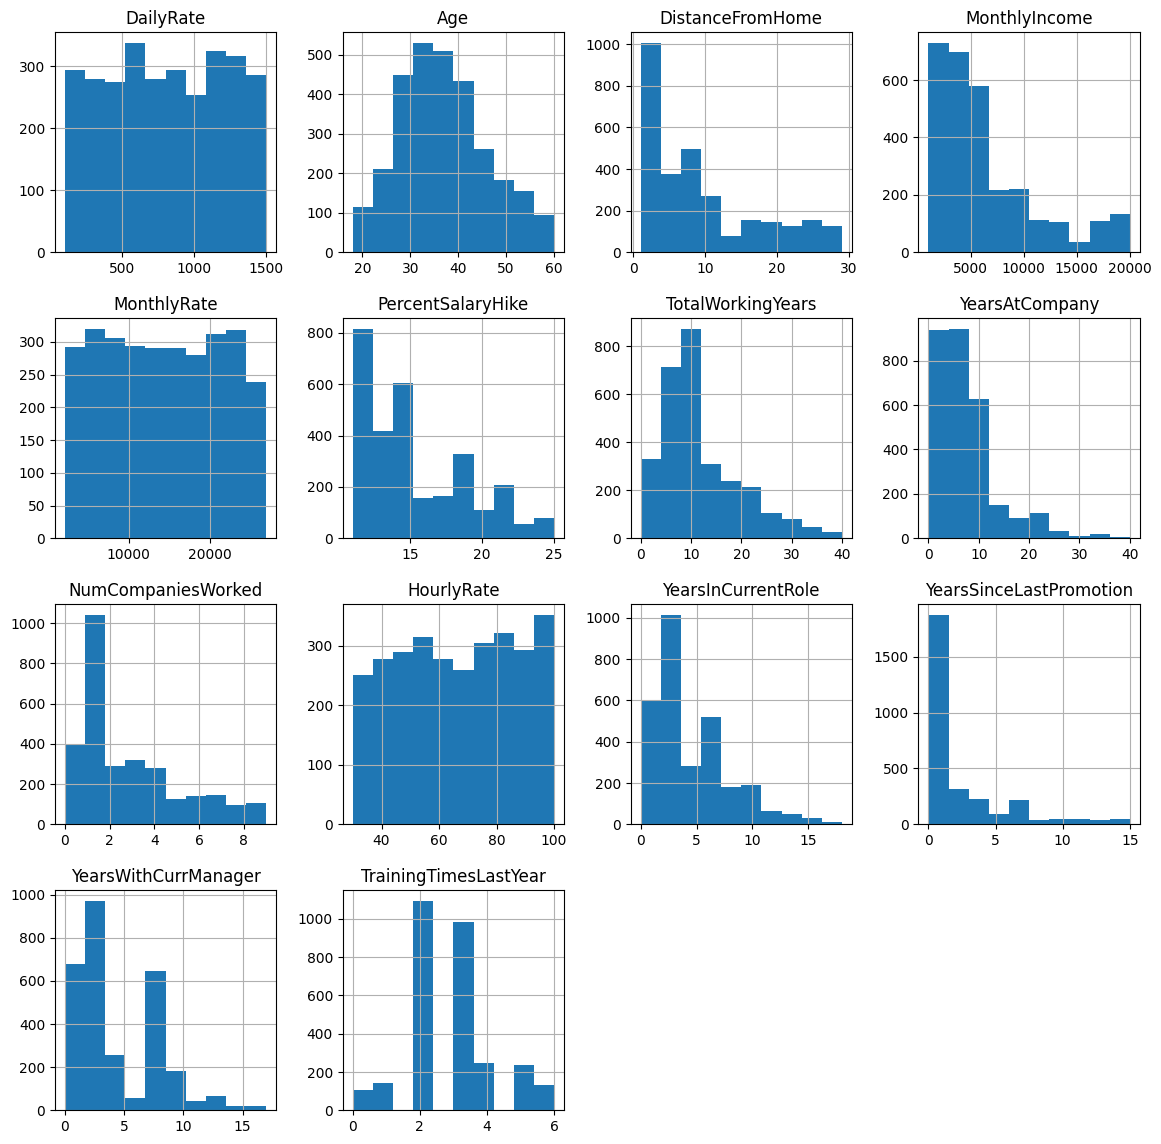

In [97]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.show()

**Observaciones:**

- **La distribución por edad se acerca a una distribución normal**, con la mayoría de los empleados entre 25 y 50 años.
- **DistanceFromHome también tiene una distribución sesgada a la derecha**, lo que significa que la mayoría de los empleados viven cerca del trabajo, pero hay algunos que viven más lejos.
- **MonthlyIncome y TotalWorkingYears están sesgados a la derecha**, lo que indica que la mayoría de los trabajadores están en puestos de nivel inicial o medio en la organización.
- **El aumento salarial porcentual está sesgado a la derecha**, lo que significa que los empleados en su mayoría obtienen aumentos salariales porcentuales más bajos.
- **La distribución de la variable YearsAtCompany muestra una buena proporción de trabajadores con más de 10 años**, lo que indica una cantidad significativa de empleados leales a la organización.
- **La distribución YearsInCurrentRole tiene tres picos en 0, 2 y 7.** Hay algunos empleados que incluso han permanecido en el mismo puesto durante 15 años o más.
- **La distribución de la variable YearsSinceLastPromotion indica que algunos empleados no han recibido un ascenso en 10-15 años y siguen trabajando en la organización.** Se supone que estos empleados son empleados con mucha experiencia laboral en puestos de alta dirección, como cofundadores, empleados de alto nivel, etc.
- Las distribuciones de DailyRate, HourlyRate y MonthlyRate parecen ser uniformes y no proporcionan mucha información. Podría ser que la tarifa diaria se refiera a los ingresos obtenidos por día adicional trabajado, mientras que la tarifa por hora podría referirse al mismo concepto aplicado a las horas adicionales trabajadas por día. Dado que estas tarifas tienden a ser muy similares para varios empleados del mismo departamento, eso explica la distribución uniforme que muestran.

### **Análisis univariado para variables categóricas**

In [98]:
for i in cat_cols:
    print(df[i].value_counts(normalize = True))

    print('*' * 40)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
****************************************
OverTime
No     0.717007
Yes    0.282993
Name: proportion, dtype: float64
****************************************
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
****************************************
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
****************************************
Education
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: proportion, dtype: float64
****************************************
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64
************************

**Observaciones:**

- **La tasa de deserción de empleados es del 16%.**
- **Alrededor del 28% de los empleados trabajan horas extra.** Esta cifra parece ser bastante alta y podría indicar que el empleado tiene estrés en su vida laboral.
- El 71% de los empleados ha viajado raramente, mientras que alrededor del 19% tiene que viajar con frecuencia.
- Alrededor del 73% de los empleados provienen de una formación académica en los campos de las ciencias biológicas y la medicina.
- Más del 65% de los empleados trabajan en el departamento de Investigación y Desarrollo de la organización.
- **Casi el 40% de los empleados tienen una satisfacción laboral baja (1) o media (2)** y una satisfacción con el entorno en la organización, lo que indica que la moral de la empresa parece ser algo baja.
- **Más del 30% de los empleados muestran un involucramiento laboral baja (1) a media (2).**
- Más del 80% de los empleados no tienen ninguna o muy pocas opciones sobre acciones.
- **En términos de calificaciones de desempeño, ninguno de los empleados ha sido calificado con una puntuación inferior a 3 (excelente).** Alrededor del 85% de los empleados tienen una calificación de desempeño igual a 3 (excelente), mientras que el resto tiene una calificación de 4 (sobresaliente). Esto podría significar que la mayoría de los empleados tienen un desempeño excelente o, lo más probable, que la organización podría ser muy indulgente con su proceso de evaluación del desempeño.

### **Analysis Bivariado y Multivariado**

**Hemos analizado distintas variables categóricas y numéricas. Veamos ahora cómo se relaciona la tasa de abandono con otras variables**

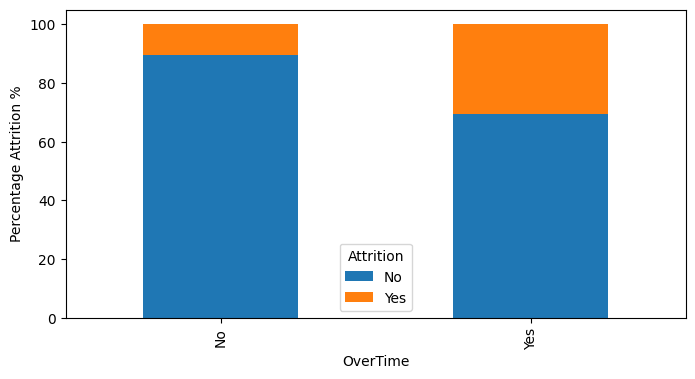

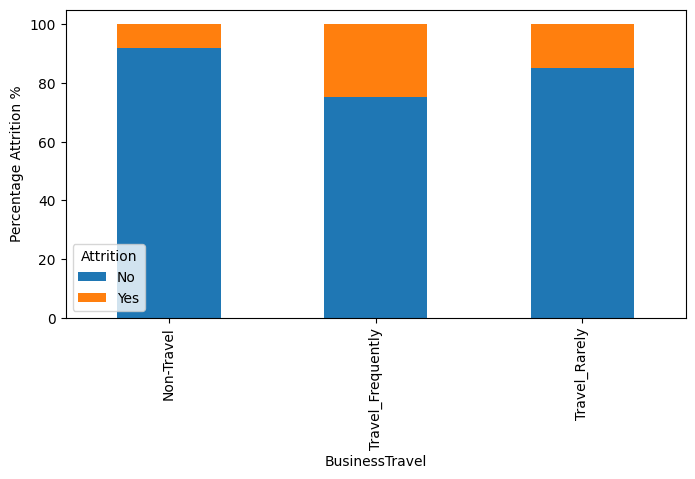

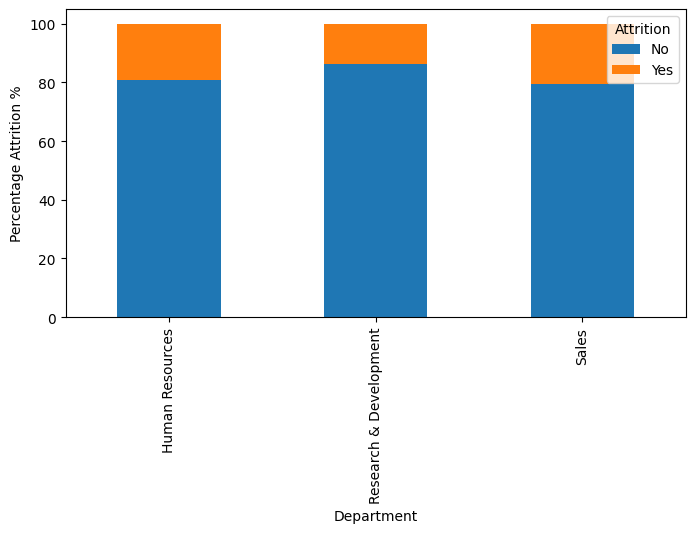

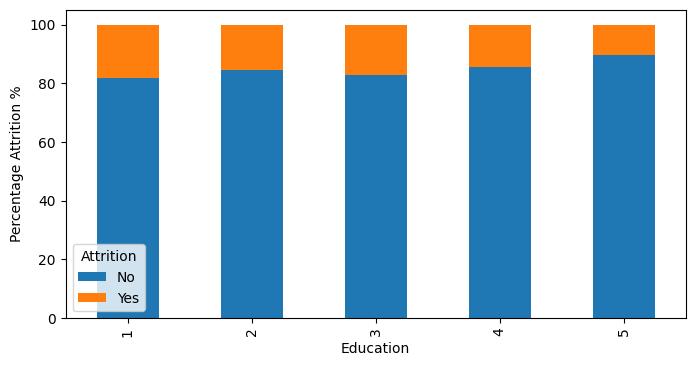

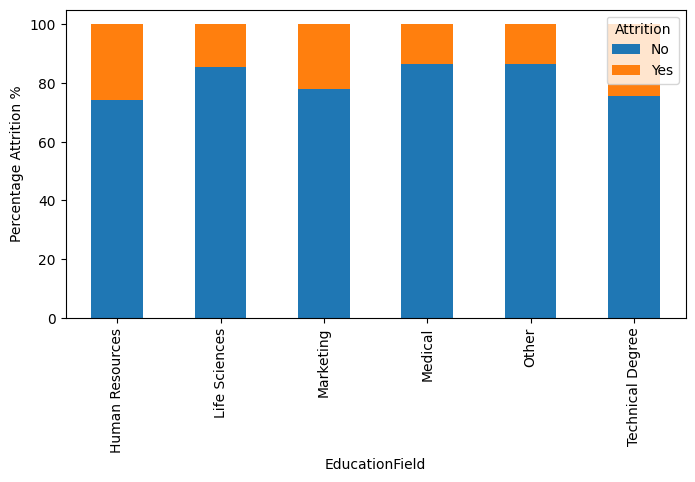

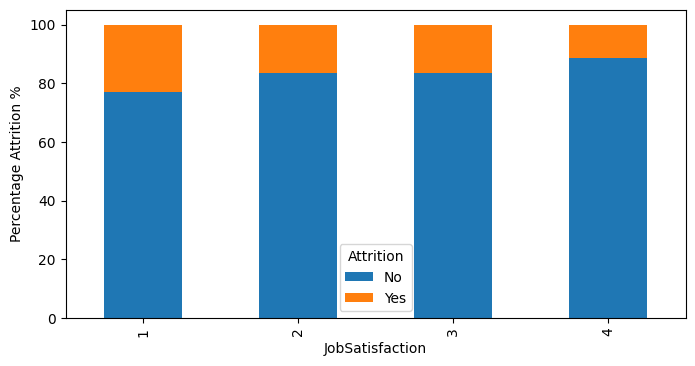

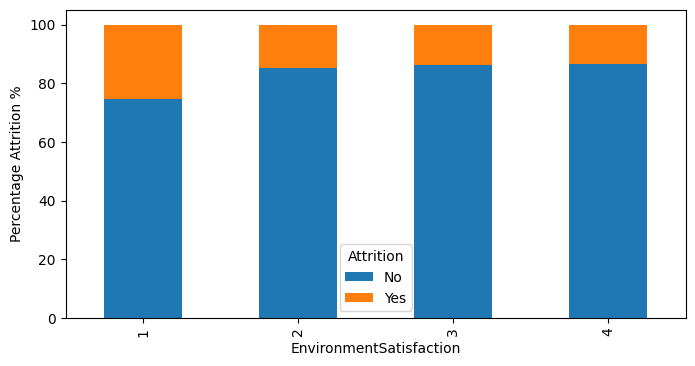

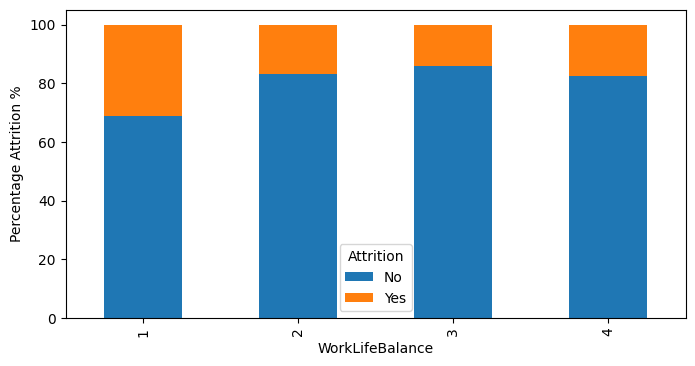

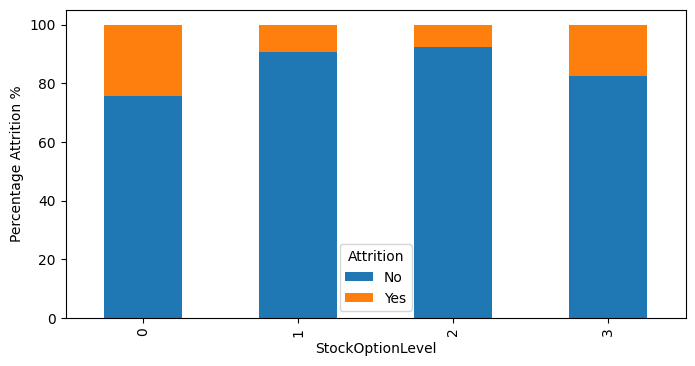

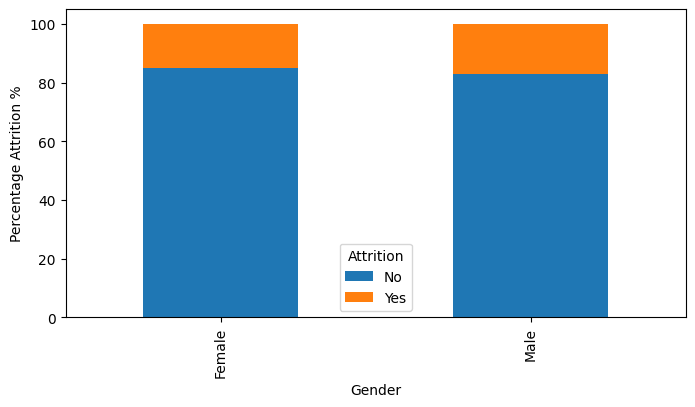

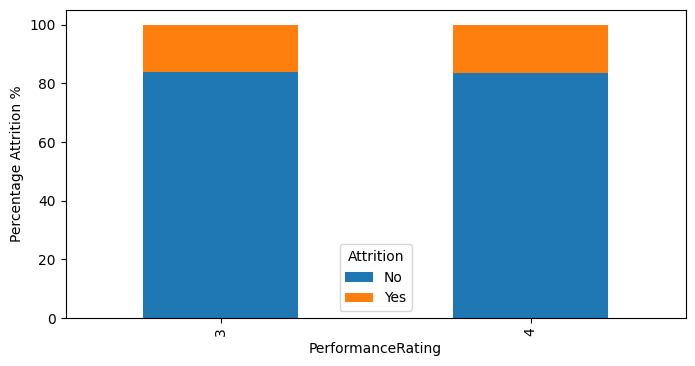

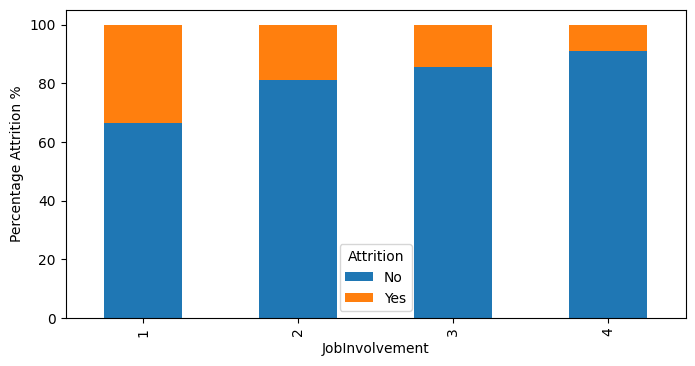

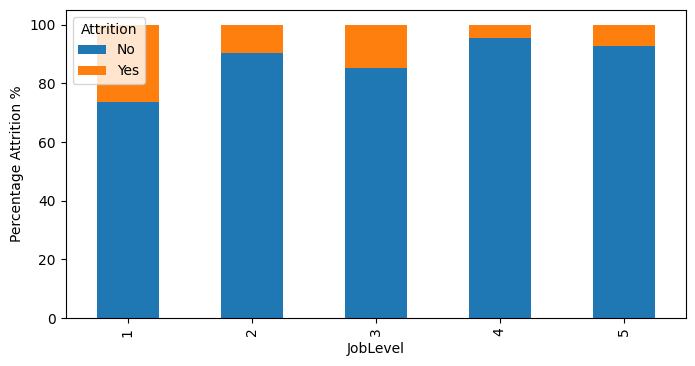

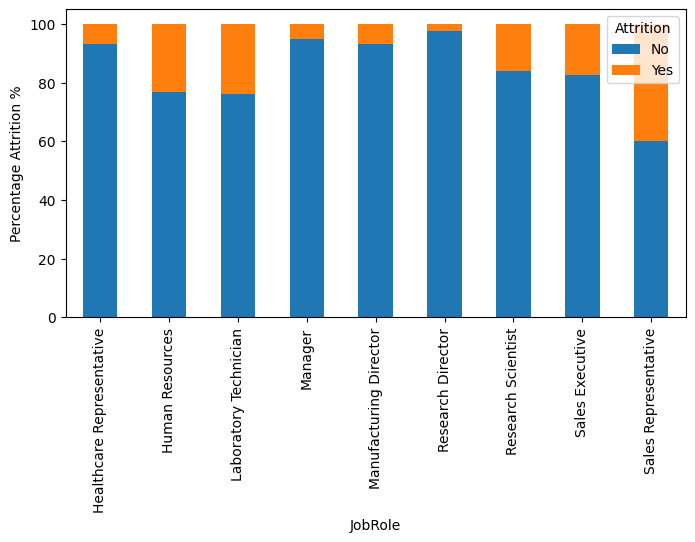

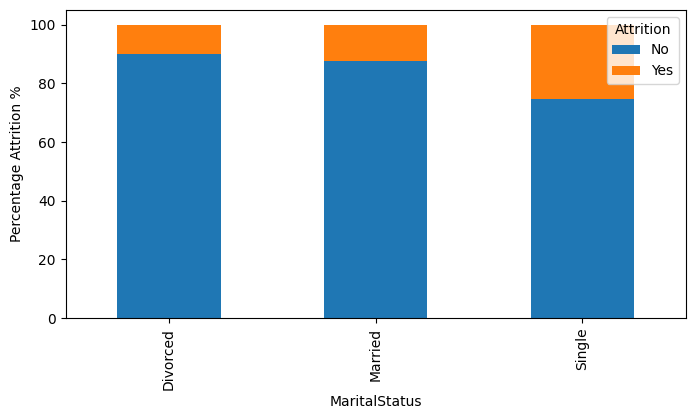

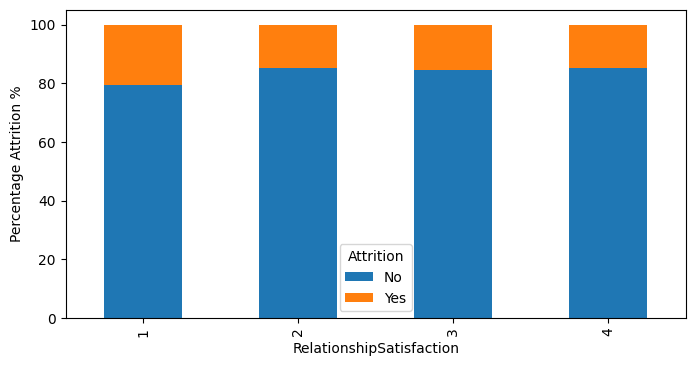

In [99]:
for i in cat_cols:
    if i != 'Attrition':
        (pd.crosstab(df[i], df['Attrition'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Attrition %')

**Observaciones:**

- **Los empleados que trabajan horas extra tienen más de un 30 % de posibilidades de deserción**, lo que es muy alto en comparación con el 10 % de posibilidades de deserción de los empleados que no trabajan horas extra.
- Como se vio anteriormente, la mayoría de los empleados trabajan para el departamento de I+D. La probabilidad de deserción allí es de aproximadamente el 15 %.
- **Los empleados que trabajan como representantes de ventas tienen una tasa de deserción de alrededor del 40 %**, mientras que los departamentos de RR. HH. y técnicos tienen una tasa de deserción de alrededor del 25 %. Los departamentos de ventas y RR. HH. tienen tasas de deserción más altas en comparación con un departamento académico como Investigación y Desarrollo, una observación que tiene sentido intuitivo si se tienen en cuenta las diferencias en esos perfiles laborales. La naturaleza de alta presión y basada en incentivos de los puestos de Ventas y Marketing puede estar contribuyendo a sus mayores tasas de deserción. - **Cuanto menor sea el nivel de involucramiento laboral del empleado, mayores serán sus probabilidades de deserción: los empleados con una puntuación de 1 en la categoría de implicación laboral deserción alcanzan el 35 %.** La razón de esto podría ser que los empleados con una menor implicación laboral pueden sentirse excluidos o menos valorados y ya han comenzado a explorar nuevas opciones, lo que genera una mayor tasa de deserción.
- **Los empleados de un nivel laboral inferior también abandonan con más frecuente:** los empleados con una puntuación de 1 en la categoría de nivel laboral muestran una probabilidad de deserción cercana al 25 %. Estos pueden ser empleados jóvenes que tienden a explorar más opciones en las etapas iniciales de sus carreras.
- **Una puntuación baja en el equilibrio entre el trabajo y la vida personal** lleva a los empleados a deserción: aproximadamente el 30 % de los empleados de la categoría con una puntuación de 1 muestran deserción.

**Comprobemos la relación entre el abandono y las variables numéricas**

In [100]:
# The mean of numerical variables grouped by attrition
df.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observaciones:**

- **Los empleados que abandonan la empresa tienen un ingreso promedio casi un 30 % menor y un 30 % menos de experiencia laboral que los que no lo hacen.** Estos podrían ser los empleados que buscan explorar nuevas opciones y/o aumentar su salario con un cambio de empresa.
- **Los empleados que abandonan la empresa también tienden a vivir un 16 % más lejos de la oficina que los que no lo hacen**. El viaje más largo hacia y desde el trabajo podría significar que tengan que gastar más tiempo/dinero todos los días, y esto podría generar insatisfacción laboral y el deseo de abandonar la organización.

####**Hemos descubierto patrones en los empleados que abandonan la empresa con más frecuencia. Ahora podemos realizar análisis más detallados con analítica predictiva.**

### **Comprobemos la relación entre distintas variables numéricas**

<Axes: >

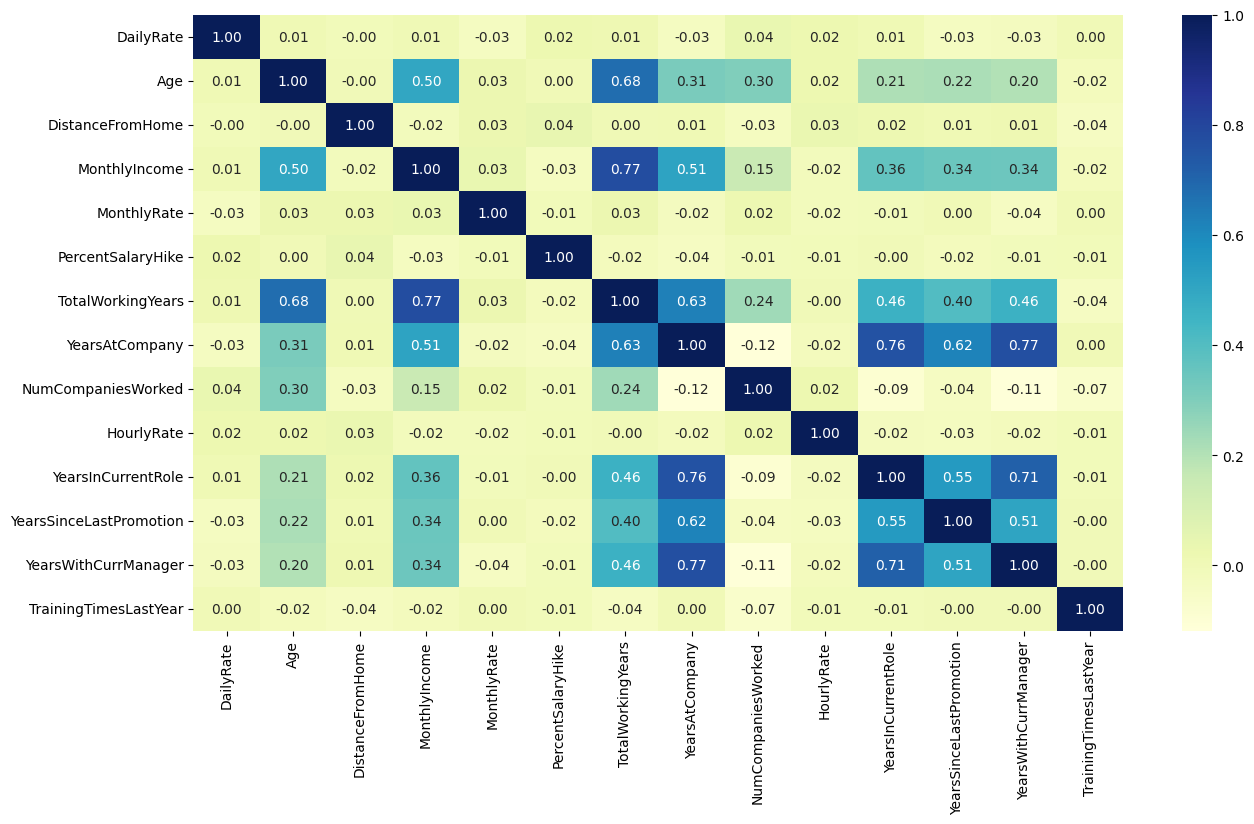

In [101]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observaciones:**

- **La experiencia laboral total, los ingresos mensuales, los años en la empresa y los años con los gerentes actuales están altamente correlacionados entre sí y con la edad del empleado**, lo cual es fácil de entender ya que estas variables muestran un aumento con la edad para la mayoría de los empleados.
- Los años en la empresa y los años en el puesto actual están correlacionados con los años desde el último ascenso, lo que significa que la empresa no está otorgando ascensos en el momento adecuado.

## **Resumen de análisis exploratorio de datos**

**Descripción de los datos:**

* Hay **2940 observaciones y 34 columnas** en los datos.
* Todas las columnas tienen 2940 valores no nulos, es decir, **no hay valores faltantes** en los datos.
* Un **número de empleado es un identificador** que es único para cada empleado. Podemos **eliminar esta columna** ya que no agregaría ningún valor a nuestro análisis.
* **Mayores de 18 años y Horas estándar tienen solo 1 valor único. Podemos eliminar estas columnas** ya que no agregarán ningún valor a nuestro análisis.
* Sobre la base de la cantidad de valores únicos en cada columna y la descripción de los datos, podemos **identificar las columnas continuas y categóricas** en los datos.

**Limpieza de datos:**

* **Las variables independientes en este conjunto de datos tienen diferentes escalas**. Cuando las características tienen diferentes escalas entre sí, existe la posibilidad de que se le dé una ponderación mayor a las características que tienen una magnitud mayor, y que predominen sobre otras características cuyos cambios de magnitud pueden ser menores, pero cuyos cambios porcentuales pueden ser igual de significativos o incluso mayores. **Esto afectará el rendimiento de nuestro algoritmo de aprendizaje automático**, y no queremos que nuestro algoritmo esté sesgado hacia una característica.
* La solución a este problema es el **escalado de características**, es decir, escalar el conjunto de datos de modo de darle a cada variable transformada una escala comparable.
* En este problema, utilizaremos el método **Standard Scaler**, que centra y escala el conjunto de datos utilizando el puntaje Z. Estandariza las características restando la media y escalándola para que tenga una varianza unitaria.


**Observaciones del análisis descriptivo o análisis exploratorio de datos:**

* La edad promedio de los empleados es de alrededor de 37 años. Tiene un rango alto, de 18 a 60 años, lo que indica una buena diversidad de edad en la organización.
* Al menos el 50% de los empleados vive en un radio de 7 km de la organización. Sin embargo, hay algunos valores extremos, dado que el valor máximo es de 29 km.
* El ingreso mensual promedio de un empleado es de USD 6500. Tiene un rango alto de valores de 1K-20K USD, lo cual es de esperar para la distribución de ingresos de cualquier organización. Hay una gran diferencia entre el valor del tercer cuartil (alrededor de USD 8400) y el valor máximo (casi USD 20000), lo que muestra que los que más ganan en la empresa tienen un ingreso desproporcionadamente grande en comparación con el resto de los empleados. Nuevamente, esto es bastante común en la mayoría de las organizaciones.
* El aumento salarial promedio de un empleado es de alrededor del 15%. Al menos el 50% de los empleados obtuvieron un aumento salarial del 14% o menos, siendo el aumento salarial máximo del 25%.
* El número promedio de años que un empleado está asociado a la empresa es 7.
* En promedio, el número de años desde que un empleado obtuvo un ascenso es de ~2,19. La mayoría de los empleados han sido ascendidos desde el último año.
* La distribución por edades se acerca a una distribución normal, con la mayoría de los empleados entre 25 y 50 años.
* DistanceFromHome también tiene una distribución sesgada hacia la derecha, lo que significa que la mayoría de los empleados viven cerca del trabajo, pero hay algunos que viven más lejos.
* MonthlyIncome y TotalWorkingYears están sesgados hacia la derecha, lo que indica que la mayoría de los trabajadores están en puestos de nivel inicial o medio en la organización.
* El aumento salarial porcentual está sesgado hacia la derecha, lo que significa que los empleados en su mayoría obtienen aumentos salariales porcentuales más bajos.
* La distribución de la variable YearsAtCompany muestra una buena proporción de trabajadores con más de 10 años, lo que indica una cantidad significativa de empleados leales a la organización.
* La distribución YearsInCurrentRole tiene tres picos en 0, 2 y 7. Hay algunos empleados que alguna vez han permanecido en el mismo puesto durante 15 años o más.
* La distribución de la variable YearsSinceLastPromotion indica que algunos empleados no han recibido un ascenso en 10 o 15 años y aún trabajan en la organización. Se supone que estos empleados son empleados con mucha experiencia laboral en roles de alta gerencia, como cofundadores, empleados de alto nivel, etc.
* Las distribuciones de DailyRate, HourlyRate y MonthlyRate parecen ser uniformes y no brindan mucha información. Podría ser que la tarifa diaria se refiera a los ingresos obtenidos por día adicional trabajado, mientras que la tarifa por hora podría referirse al mismo concepto aplicado a las horas adicionales trabajadas por día. Dado que estas tarifas tienden a ser similares en términos generales para varios empleados del mismo departamento, eso explica la distribución uniforme que muestran.
* La tasa de deserción de empleados es del 16%.
* Alrededor del 28% de los empleados trabajan horas extra. Esta cifra parece ser bastante alta y podría indicar que el empleado tiene una vida laboral estresada. Los empleados que trabajan horas extra tienen más de un 30% de posibilidades de deserción, lo que es muy alto en comparación con el 10% de posibilidades de deserción de los empleados que no trabajan horas extra.
* El 71% de los empleados ha viajado raramente, mientras que alrededor del 19% tiene que viajar con frecuencia.
* Alrededor del 73% de los empleados provienen de un entorno educativo en los campos de las ciencias biológicas y la medicina.
* Más del 65% de los empleados trabajan en el departamento de Investigación y Desarrollo de la organización. La probabilidad de deserción allí es de aproximadamente el 15%.
* Casi el 40% de los empleados tienen una satisfacción laboral y un ambiente de trabajo bajos (1) o medios (2) en la organización, lo que indica que la moral de la empresa parece ser algo baja.
* Más del 30% de los empleados muestran un nivel de compromiso laboral bajo (1) a medio (2).
* Más del 80% de los empleados no tienen ninguna opción de compra de acciones o tienen muy pocas.
* En términos de calificaciones de desempeño, ninguno de los empleados ha sido calificado con una puntuación inferior a 3 (excelente). Alrededor del 85% de los empleados tienen una calificación de desempeño igual a 3 (excelente), mientras que el resto tiene una calificación de 4 (sobresaliente). Esto podría significar que la mayoría de los empleados tienen un desempeño superior, o el escenario más probable es que la organización podría ser muy indulgente con su proceso de evaluación de desempeño.
* Los empleados que trabajan como representantes de ventas tienen una tasa de deserción de alrededor del 40%, mientras que los departamentos de RR.HH. y técnicos tienen una tasa de deserción de alrededor del 25%. Los departamentos de ventas y RR.HH. tienen tasas de deserción más altas en comparación con un departamento académico como Investigación y Desarrollo, una observación que tiene sentido intuitivo si se tienen en cuenta las diferencias en esos perfiles laborales. La naturaleza de alta presión y basada en incentivos de los roles de Ventas y Marketing puede estar contribuyendo a sus tasas de deserción más altas. * Cuanto menor sea la implicación laboral del empleado, mayores serán sus probabilidades de deserción; los empleados con una puntuación de 1 en la categoría de implicación laboral dejan de trabajar a la empresa en un 35 %. Esto podría deberse a que los empleados con una menor implicación laboral pueden sentirse excluidos o menos valorados y ya han comenzado a explorar nuevas opciones, lo que genera una mayor tasa de deserción.
* Los empleados de un nivel laboral inferior también dejan de trabajar a la empresa en mayor medida; los empleados con una puntuación de 1 en la categoría de nivel laboral muestran una probabilidad de deserción de casi el 25 %. Estos pueden ser empleados jóvenes que tienden a explorar más opciones en las etapas iniciales de sus carreras.
* Una puntuación baja en el equilibrio entre el trabajo y la vida personal hace que los empleados dejen de trabajar; aproximadamente el 30 % de los empleados con una puntuación de 1 muestran deserción.
* Los empleados que dejan de trabajar en la empresa tienen un ingreso promedio casi un 30 % menor y una experiencia laboral un 30 % menor que los que no lo hacen. Estos podrían ser los empleados que buscan explorar nuevas opciones o aumentar su salario con un cambio de empresa.
* Los empleados que muestran desgaste también tienden a vivir un 16 % más lejos de la oficina que los que no lo hacen. El mayor tiempo que deben recorrer para ir y volver del trabajo puede significar que tienen que dedicar más tiempo y dinero cada día, y esto podría generar insatisfacción laboral y deseos de abandonar la organización.
* La experiencia laboral total, los ingresos mensuales, los años en la empresa y los años con los gerentes actuales están altamente correlacionados entre sí y con la edad del empleado, lo que es fácil de entender, ya que estas variables muestran un aumento con la edad para la mayoría de los empleados.
* Los años en la empresa y los años en el puesto actual están correlacionados con los años desde el último ascenso, lo que significa que la empresa no está otorgando ascensos en el momento adecuado.

## **ANÁLISIS DE CLÚSTER PARA SEGMENTAR COLABOARADORES DE LA EMRPESA**

---



> En esta sección se realizará un análisis de conglomerado o agrupación (clústers) con el objetivo de identificar características de grupos de empleados. Se utilizará el agoritmo **KMEANS**, y dado que esta técnica es más eficiente trabajando con **datos numéricos**, a continuación se presentan las variables numéricas a considerar en en este análisis.





In [102]:
data_cl = df.select_dtypes(include='number')
data_cl.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
Education,2940.0,2.912925,1.023991,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.0,3.0,4.0,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.0,3.0,3.0,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0


**Observaciones:**

-En base a las estadísticas descriptivas de las variables numéricas, se recomienda seleccionar variables que capturan diversos aspectos de las características de los empleados y reducir el tamaño de las variables, de tal manera podamos realizar una interpretación sencilla de los clústers. Por lo tanto solo se utiliza la variable **Edad, Salario y Años en puesto actual.**




In [103]:
data_cl = df[['Age', 'MonthlyIncome', 'YearsInCurrentRole']]
data_cl.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
YearsInCurrentRole,2940.0,4.229252,3.622521,0.0,2.0,3.0,7.0,18.0


In [104]:
data_cl = data_cl.loc[:, data_cl.var() > 0.0]

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cl)

Text(0, 0.5, 'Inertia')

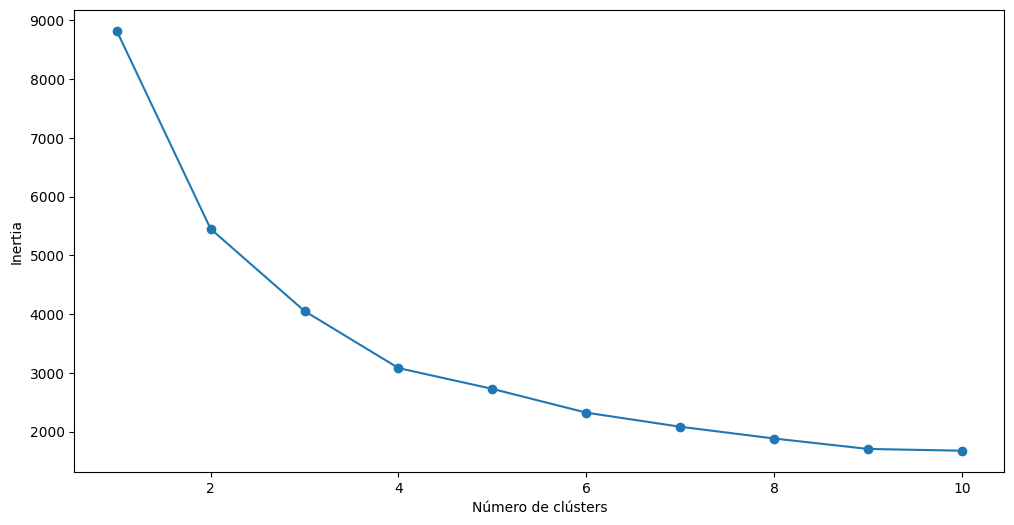

In [106]:
from sklearn.cluster import KMeans

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
test_clusters = 10
for cluster in range(1,test_clusters+1):
    kmeans = KMeans(n_clusters=cluster, n_init="auto")
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Número de clústers')
plt.ylabel('Inertia')

<Axes: xlabel='PC1', ylabel='PC2'>

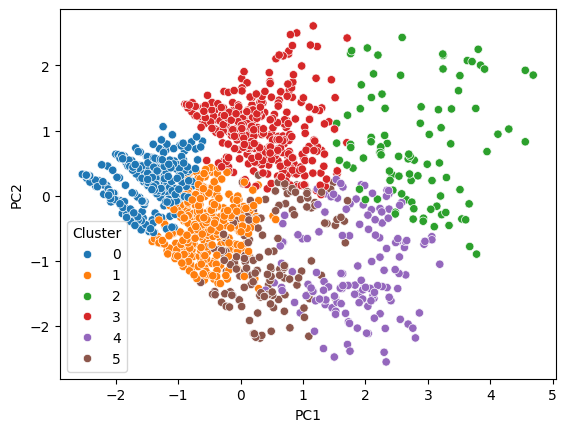

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

kmeans = KMeans(n_clusters=6, n_init="auto").fit(data_scaled) ##AQUÍ PUEDES CAMBIAR EL NÚMERO DE CLÚSTERS QUE CONSIDERES DE ACUERDO A LA FIGURA ANTERIOR n_clusters=3,4,5 O 6.

pc_transformation['Cluster'] = pd.Categorical(kmeans.labels_)

sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue="Cluster")



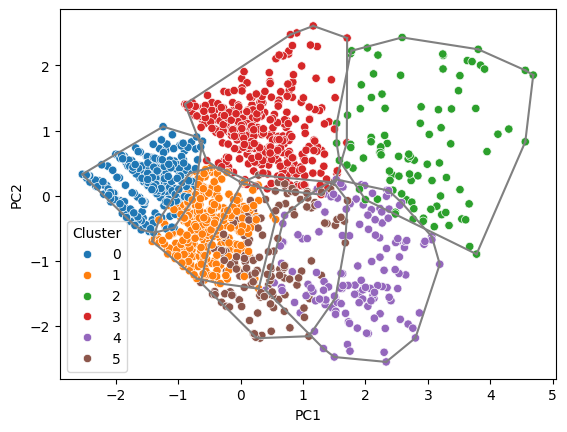

In [108]:
from scipy.spatial import ConvexHull

def plot_convex_hull(data_hull, cl_col, colx="PC1", coly="PC2"):
    # Usa colx, coly para el scatterplot
    #cl_method: nombre de la columna de resultados de clustering, se usa para el hue
    # color, lista de colores, tantos como clusteres
    sns.scatterplot(x=data_hull[colx], y=data_hull[coly], hue=data_hull[cl_col])

    for ci in np.unique(data_hull[cl_col]):

        points = np.array(data_hull[[colx, coly]])
        points = points[np.where(data_hull[cl_col] == ci)[0]]
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'grey')

plot_convex_hull(pc_transformation, 'Cluster')
plt.show()

In [109]:
data_cl['Cluster'] = kmeans.labels_
data_cl.groupby("Cluster").describe().T

Cluster                             0             1             2  \
Age                count   668.000000    764.000000    194.000000   
                   mean     26.410180     36.240838     46.917526   
                   std       3.612740      3.464799      6.921724   
                   min      18.000000     28.000000     33.000000   
                   25%      24.000000     34.000000     41.000000   
                   50%      27.000000     36.000000     47.000000   
                   75%      29.000000     39.000000     53.000000   
                   max      32.000000     44.000000     60.000000   
MonthlyIncome      count   668.000000    764.000000    194.000000   
                   mean   3114.119760   4955.609948  15309.247423   
                   std    1241.857521   2337.071041   3535.579348   
                   min    1009.000000   1281.000000   6306.000000   
                   25%    2297.000000   2936.000000  13206.000000   
                   50%    2766.500000   4580.000000  16291.000000   
                   75%    3929.000000   6334.000000  18722.000000   
                   max    8639.000000  13675.000000  19999.000000   
YearsInCurrentRole count   668.000000    764.000000    194.000000   
                   mean      1.718563      1.895288     11.257732   
                   std       1.345262      1.381218      2.979301   
                   min       0.000000      0.000000      8.000000   
                   25%       0.000000      0.000000      9.000000   
                   50%       2.000000      2.000000     10.000000   
                   75%       2.000000      3.000000     14.000000   
                   max       5.000000      5.000000     18.000000   

Cluster                              3             4             5  
Age                count    704.000000    290.000000    320.000000  
                   mean      34.647727     48.062069     49.356250  
                   std        5.092129      5.834180      4.802490  
                   min       25.000000     31.000000     42.000000  
                   25%       31.000000     44.000000     45.000000  
                   50%       34.000000     49.000000     49.000000  
                   75%       38.000000     53.000000     53.000000  
                   max       49.000000     60.000000     60.000000  
MonthlyIncome      count    704.000000    290.000000    320.000000  
                   mean    6176.122159  15354.448276   4629.768750  
                   std     2598.459552   3250.337609   1977.230599  
                   min     2028.000000  10096.000000   2011.000000  
                   25%     4310.500000  12965.000000   2833.000000  
                   50%     5696.500000  16184.000000   4530.000000  
                   75%     7884.500000  18303.000000   5505.000000  
                   max    16124.000000  19943.000000  10239.000000  
YearsInCurrentRole count    704.000000    290.000000    320.000000  
                   mean       7.943182      3.531034      3.243750  
                   std        1.780936      2.558804      2.473044  
                   min        5.000000      0.000000      0.000000  
                   25%        7.000000      2.000000      2.000000  
                   50%        7.000000      3.000000      2.000000  
                   75%        9.000000      6.000000      5.000000  
                   max       16.000000      7.000000      9.000000

**Observaciones:**

**Grupos 0 y 2**: representan a empleados de mayor edad y con altos ingresos, pero el grupo 2 tiene empleados que son más nuevos en sus puestos, mientras que el grupo 0 tiene empleados con más experiencia.

**Grupos 1 y 4**: representan a empleados de mediana edad con ingresos moderados y una experiencia significativa en sus puestos.

**Grupo 3**: representa a los empleados más jóvenes y con los ingresos más bajos, con poca experiencia en sus puestos actuales.

**Grupo 5**: representa a empleados de mediana edad con ingresos más bajos y una experiencia relativamente corta en sus puestos actuales.

A continuación se presenta varios gráficos de violin (que permiten ver la distribución de los datos) de los clusters y abandono.

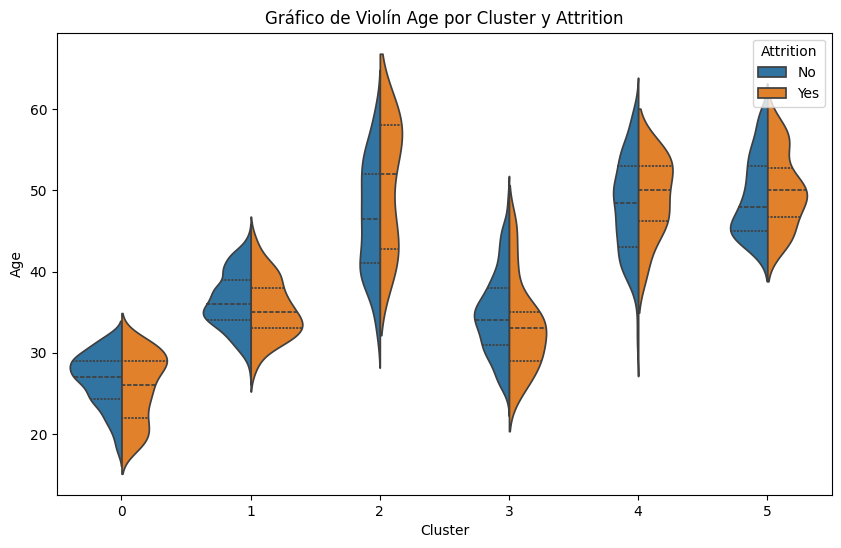

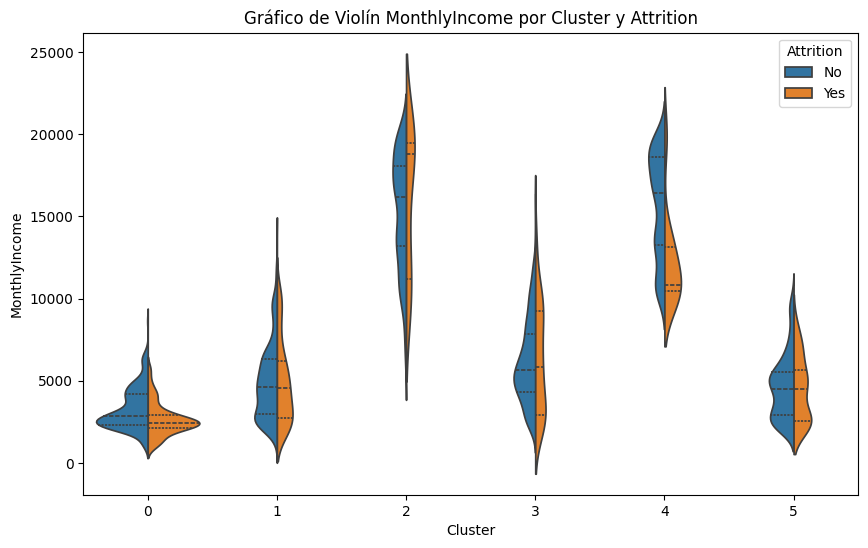

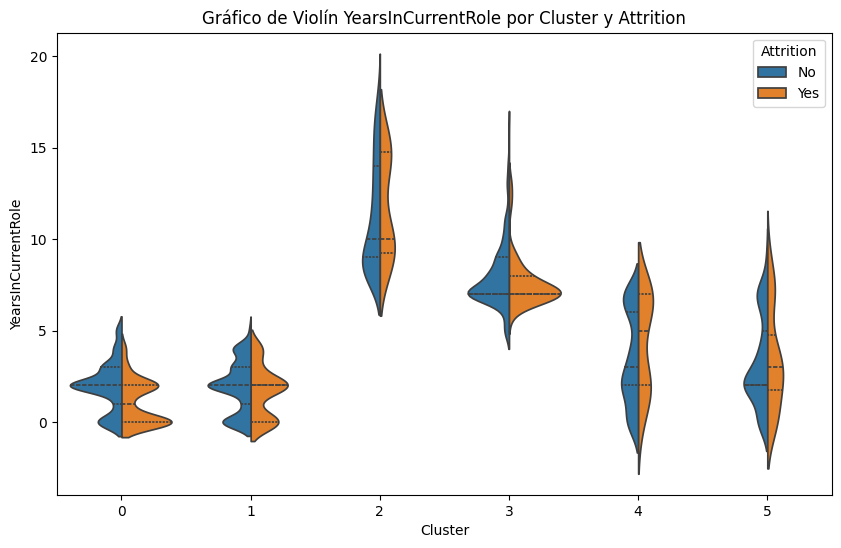

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_violin_plots(df, cluster_labels, variables, hue_var='Attrition'):
    """
    Generates violin plots for each variable used in clustering analysis.

    Parameters:
    df (pd.DataFrame): The original DataFrame containing the data.
    cluster_labels (array-like): The cluster labels generated by KMeans.
    variables (list): A list of variable names (numeric columns) to plot.
    hue_var (str): The column name to be used for color-coding (e.g., 'Attrition').
    """
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=df, x=cluster_labels, y=var, hue=hue_var, split=True, inner="quartile")
        plt.title(f'Gráfico de Violín {var} por Cluster y {hue_var}')
        plt.xlabel('Cluster')
        plt.ylabel(var)
        plt.show()

# Variables used in the cluster analysis
cluster_vars = data_cl.columns.drop('Cluster')  # Exclude 'Cluster' from the list

# Generate the violin plots
generate_violin_plots(df, kmeans.labels_, cluster_vars)

**Observaciones:**

**-Salario y abandono:** los grupos 0, 3 y 5 muestran que los empleados con
bajos ingresos tienen más probabilidades de abandonar la empresa. Los aumentos salariales podrían ayudar a retener a los empleados en estos grupos.

**-Edad y abandono:** los empleados más jóvenes en los grupos 0 y 3, y algunos empleados de mediana carrera en el grupo 5, tienen un mayor riesgo de deserción. Para retener a los empleados más jóvenes, es posible que sea necesario centrarse en el desarrollo profesional y las oportunidades de crecimiento.

**-Años en el puesto actual y abandono:** una permanencia más corta en el puesto actual está fuertemente asociada con una mayor deserción, especialmente en los grupos 0, 2, 3 y 5. Esto sugiere que las intervenciones tempranas (por ejemplo, cambios de puesto, promociones o nuevos desafíos) podrían ayudar a reducir la deserción.

La combinación de **una edad más joven, ingresos más bajos y un menor tiempo en el puesto actual se perciben como causas de abandono**. Centrarse en
estrategias como la remuneración competitiva, el desarrollo profesional y el compromiso en las primeras etapas del empleo podría ayudar a reducir la rotación.

**Ahora que hemos explorado nuestros datos, construyamos modelos predictivos**

## **Creación de modelos: enfoque**

1. Prepare los datos para el modelado.
2. Divida los datos en conjuntos de prueba y de entrenamiento.
3. Cree el modelo con los datos de entrenamiento.
4. Ajuste el modelo si es necesario.
5. Pruebe los datos en el conjunto de prueba.

### **Preparación de datos para modelado**

**Creación de variables "DUMMY" para variables categóricas**

In [167]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)



In [112]:
# List the new columns created by get_dummies()
new_dummy_columns = [col for col in df.columns if any(item in col for item in to_get_dummies_for)]
print("Dummy Variables Created:")
print(new_dummy_columns)

# Display the first few rows of these dummy variables to observe their values
print("\nFirst 5 rows of the dummy variables:")
df[new_dummy_columns].head()

Dummy Variables Created:
['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'Gender_Male', 'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single']

First 5 rows of the dummy variables:


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,False,True,False,True,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,True,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,True,False,True,False,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


**Separar las variables independientes (X) y la variable dependiente (Y)**. La variable objeto de estudio es Abandono

In [168]:
# Separating the target variable and other variables
Y = df.Attrition
X = df.drop(columns = ['Attrition'])

### **Escalado de los datos**

Las variables independientes en este conjunto de datos tienen diferentes escalas. Cuando las características tienen diferentes escalas entre sí, existe la posibilidad de que se le dé una ponderación mayor a las características que tienen una magnitud mayor, y que predominen sobre otras características cuyos cambios de magnitud pueden ser menores, pero cuyos cambios porcentuales pueden ser igual de significativos o incluso mayores. Esto afectará el rendimiento de nuestro algoritmo de aprendizaje automático, y no queremos que nuestro algoritmo esté sesgado hacia una característica.

La solución a este problema es el **Escalado de características**, es decir, escalar el conjunto de datos de modo de dar a cada variable transformada una escala comparable.

En este problema, utilizaremos el método **Standard Scaler**, que centra y escala el conjunto de datos utilizando el puntaje Z.

Estandariza las características restando la media y escalándola para que tenga una varianza unitaria.

La puntuación estándar de la muestra x se calcula como:

**z = (x - u) / s**

donde **u** es la media de las muestras de entrenamiento (cero) y **s** es la desviación estándar de las muestras de entrenamiento.

In [169]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

#### **División de los datos en un 70 % de conjuntos de entrenamiento y un 30 % de conjuntos de prueba**

Algunos problemas de clasificación pueden presentar un gran desequilibrio en la distribución de las clases objetivo: por ejemplo, podría haber varias veces más muestras negativas que positivas. En tales casos, se recomienda utilizar la técnica de **muestreo estratificado** para garantizar que las frecuencias de clase relativas se conserven aproximadamente en cada serie y pliegue de validación.

In [170]:
# Splitting the data
# BEST PRACTICE> INLCUIDE TRAINING, TESTING, VALIDATION
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Criterio de evaluación del modelo**

**El modelo puede hacer dos tipos de predicciones erróneas:**

1. Predecir que un empleado abandonará cuando no lo hace
2. Predecir que un empleado no abandonará cuando en realidad lo hace

**¿Qué caso es más importante?**

* **Predecir que el empleado no se desvinculará, pero el empleado se desvincula**, es decir, perder un empleado o activo valioso. Esto se consideraría un error importante para cualquier predictor de deserción de empleados y, por lo tanto, es el caso más importante de predicciones erróneas.

**¿Cómo reducir esta pérdida, es decir, la necesidad de reducir los falsos negativos?**
* **La empresa querría que se maximice el recall**, cuanto mayor sea el recuerdo, mayores serán las posibilidades de minimizar los falsos negativos. Por lo tanto, el enfoque debe estar en aumentar la recuperación (minimizando los falsos negativos) o, en otras palabras, identificar muy bien los verdaderos positivos (es decir, la clase 1), de modo que la empresa pueda ofrecer incentivos para controlar la tasa de deserción, especialmente para los empleados con mejor desempeño. Esto ayudaría a optimizar el costo general del proyecto para retener a los mejores talentos.

Además, creemos una función para calcular e imprimir el informe de clasificación y la matriz de confusión para que no tengamos que reescribir el mismo código repetidamente para cada modelo.

In [171]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['No Abandona', 'Abandona'], yticklabels = ['No Abandona', 'Abandona'])

    plt.ylabel('Real')

    plt.xlabel('Predicho')

    plt.show()

### **Construcción del modelo**

Construiremos diferentes modelos:
- **Regresión logística**

### **Regresión logística**

- La regresión logística es un algoritmo de aprendizaje supervisado, generalmente utilizado para **problemas de clasificación binaria**, es decir, donde la variable dependiente es categórica y tiene solo dos valores posibles. En la regresión logística, utilizamos la función sigmoidea para calcular la probabilidad de un evento Y, dadas algunas características X como:

                                          P(Y)=1/(1 + exp(-X))

In [172]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

**Comprobación del rendimiento del modelo**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1726
           1       0.65      0.64      0.64       332

    accuracy                           0.89      2058
   macro avg       0.79      0.79      0.79      2058
weighted avg       0.89      0.89      0.89      2058



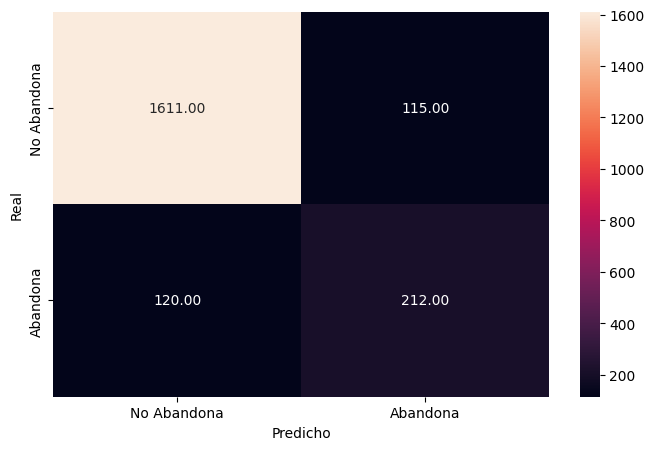

In [173]:
# Checking the performance on the training data
optimal_threshold1 = .35

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

El modelo tuvo 1611 predicciones correctas en la clase "No Abandona" y 212 predicciones correctas en la clase "Abandona". Esto indica que el modelo sigue siendo más preciso en predecir a los empleados que no abandonan, pero también ha mejorado en identificar correctamente a aquellos que sí lo hacen en comparación con la matriz de confusión anterior.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.62      0.63      0.63       142

    accuracy                           0.88       882
   macro avg       0.78      0.78      0.78       882
weighted avg       0.88      0.88      0.88       882



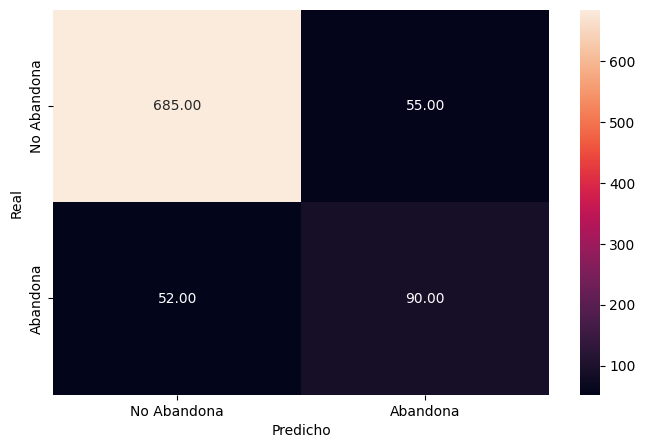

In [174]:
# Checking the performance on the test dataset
optimal_threshold1 = .35

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

El modelo tiene un buen rendimiento en la predicción de empleados que no abandonan, pero sigue teniendo un margen de error en la identificación de empleados que efectivamente abandonan. Esto sugiere que puede ser necesario ajustar o mejorar el modelo para mejorar la detección de abandonos, quizás revisando el balance de clases o ajustando el umbral de decisión.

**Observaciones:**
- **Obtenemos una precisión de alrededor del 90 %** en los conjuntos de datos de prueba y entrenamiento.
- Sin embargo, **la recuperación (recall) de este modelo es solo de alrededor del 50 % para la clase 1 en los datos de entrenamiento y del 46 % en los datos de prueba.**
- Como la recuperación es baja, **este modelo no funcionará bien** para diferenciar a los empleados que tienen una alta probabilidad de abandonar la empresa, lo que significa que, en última instancia, no ayudará a reducir la tasa de deserción.
- Como podemos ver en la Matriz de confusión, **este modelo no es bueno para identificar a los empleados que corren el riesgo de abandonar la empresa.**

**Revisemos los coeficientes y encontremos qué variables están provocando deserción y cuáles pueden ayudar a reducirla.**

In [144]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
OverTime,0.958034
BusinessTravel_Travel_Frequently,0.716046
MaritalStatus_Single,0.618145
YearsSinceLastPromotion,0.552935
YearsAtCompany,0.523238
NumCompaniesWorked,0.501137
Department_Sales,0.483346
Department_Research & Development,0.482820
BusinessTravel_Travel_Rarely,0.441384
DistanceFromHome,0.384346


**Observaciones:**

**Las características que afectan positivamente la tasa de deserción son:**
- Horas extras
- Viajes de negocios_Viaja_con_frecuencia
- Departamento_Investigación y desarrollo
- Cargo_Ejecutivo de ventas
- Estado civil_Soltero
- Departamento_Ventas
- Núm. de empresas trabajadas
- Años desde la última promoción
- Nivel de trabajo_5
- Viajes de negocios_Viaja_rara vez
- Distancia desde casa
- Años en la empresa
- Cargo_Recursos humanos
- Cargo_Representante de ventas

**Las características que afectan negativamente la tasa de deserción son:**
- Ingresos mensuales
- Implicación laboral_3
- Nivel de trabajo_2
- Satisfacción con el medio ambiente_4
- Implicación laboral_4
- Implicación laboral_2
- Satisfacción con el medio ambiente_3
- Campo educativo_Ciencias de la vida
- Satisfacción con el medio ambiente_2
- YearsWithCurrManager
- Rol de trabajo_Director de investigación
- TotalWorkingYears
- Satisfacción laboral

Los coeficientes del modelo de regresión logística nos dan el logaritmo de las probabilidades, que es difícil de interpretar en el mundo real. Podemos convertir el logaritmo de las probabilidades en probabilidades tomando su exponencial.

In [145]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
OverTime,2.606567
BusinessTravel_Travel_Frequently,2.046326
MaritalStatus_Single,1.855483
YearsSinceLastPromotion,1.738348
YearsAtCompany,1.687483
NumCompaniesWorked,1.650597
Department_Sales,1.621491
Department_Research & Development,1.620638
BusinessTravel_Travel_Rarely,1.554858
DistanceFromHome,1.468653


**Observaciones:**

- Las probabilidades de que un empleado que trabaja horas extras se desvincule son **2,6 veces** las probabilidades de uno que no trabaja horas extras, probablemente porque trabajar horas extras no es sostenible durante un período prolongado para ningún empleado y puede provocar agotamiento e insatisfacción laboral.
- Las probabilidades de que un empleado que viaja con frecuencia se desvincule son **el doble** de las probabilidades de un empleado que no viaja con tanta frecuencia.
- Las probabilidades de que un empleado soltero se desvincule son aproximadamente **1,85 veces (85 % más altas que)** las probabilidades de un empleado con otro estado civil.

**Función para optimizar y encontrar las variables dependientes con mayor impacto en variable dependiente (Abando)**

In [175]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize the logistic regression model
model = LogisticRegression()

# Use RFE (Recursive Feature Elimination) for feature selection
rfe = RFE(model, n_features_to_select=10)  # Choose the number of features to select, can be adjusted
rfe = rfe.fit(x_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_

# Create a dataframe to view feature importance
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
})

# Display the features sorted by their ranking
feature_ranking = feature_ranking.sort_values(by='Ranking', ascending=True)
print(feature_ranking)

                              Feature  Ranking
53               MaritalStatus_Single        1
35          EnvironmentSatisfaction_4        1
37                   JobInvolvement_2        1
38                   JobInvolvement_3        1
39                   JobInvolvement_4        1
8                            OverTime        1
13                  TotalWorkingYears        1
5                       MonthlyIncome        1
49         JobRole_Research Scientist        1
40                         JobLevel_2        1
34          EnvironmentSatisfaction_3        2
33          EnvironmentSatisfaction_2        3
7                  NumCompaniesWorked        4
18            YearsSinceLastPromotion        5
48          JobRole_Research Director        6
20   BusinessTravel_Travel_Frequently        7
21       BusinessTravel_Travel_Rarely        8
2                    DistanceFromHome        9
4                     JobSatisfaction       10
19               YearsWithCurrManager       11
16           

In [187]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


# Select important features (features ranked as 1 in RFE)
important_features = ['MaritalStatus_Single', 'EnvironmentSatisfaction_4', 'JobInvolvement_2',
                      'JobInvolvement_3', 'JobInvolvement_4', 'OverTime',
                      'TotalWorkingYears', 'MonthlyIncome', 'JobRole_Research Scientist',
                      'JobLevel_2']

# Create a new dataset with only the important features
X_selected = X_scaled[important_features]

# Split the dataset into training and testing sets
x_train_selected, x_test_selected, y_train, y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=1, stratify=Y)

# Initialize the Logistic Regression model
lg = LogisticRegression()

# Fit the model with the selected features
lg.fit(x_train_selected, y_train)

# Make predictions
y_pred = lg.predict(x_test_selected)
y_pred_prob = lg.predict_proba(x_test_selected)[:, 1]  # Get probabilities for ROC-AUC

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Using statsmodels for detailed summary output (interpretation of coefficients)
X_train_sm = sm.add_constant(x_train_selected)  # Add intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary of the logistic regression model using statsmodels
print("\nLogistic Regression Summary (Statsmodels):\n")
print(result.summary())


Accuracy: 0.8560090702947846
Precision: 0.6190476190476191
Recall (Sensitivity): 0.2746478873239437
F1 Score: 0.3804878048780488
ROC-AUC Score: 0.7622192615150362

Confusion Matrix:
 [[716  24]
 [103  39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       740
           1       0.62      0.27      0.38       142

    accuracy                           0.86       882
   macro avg       0.75      0.62      0.65       882
weighted avg       0.83      0.86      0.83       882

Optimization terminated successfully.
         Current function value: 0.344956
         Iterations 7

Logistic Regression Summary (Statsmodels):

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2047
Method:                           MLE   Df Model:         

## **Resumen de los hallazgos clave:**

**Variables significativas:** todas las variables enumeradas son estadísticamente significativas (valores p < 0,05), lo que indica que tienen un impacto significativo en la predicción de la deserción de empleados.

**Coeficientes positivos:** MaritalStatus_Single y OverTime tienen coeficientes positivos, lo que significa que los empleados solteros y aquellos que trabajan horas extra tienen más probabilidades de abandonar la empresa.

**Coeficientes negativos:** variables como EnvironmentSatisfaction_4, JobInvolvement, TotalWorkingYears, MonthlyIncome, JobRole_Research Scientist y JobLevel_2 tienen coeficientes negativos, lo que indica que los valores más altos de estos factores reducen la probabilidad de deserción.





In [189]:
# Print Odds Ratios (exp(coef)) in a table
odds_ratios = np.exp(result.params)

# Create a table with coefficients and odds ratios
odds_ratios_table = pd.DataFrame({
    'Feature': result.params.index,
    'Coefficient': result.params.values,
    'Odds Ratio': odds_ratios.values
})

# Print the table
print("\nOdds Ratios Table:\n")
print(odds_ratios_table)


Odds Ratios Table:

                       Feature  Coefficient  Odds Ratio
0                        const    -2.168329    0.114369
1         MaritalStatus_Single     0.434313    1.543902
2    EnvironmentSatisfaction_4    -0.208881    0.811492
3             JobInvolvement_2    -0.432297    0.649016
4             JobInvolvement_3    -0.714827    0.489277
5             JobInvolvement_4    -0.608093    0.544388
6                     OverTime     0.784525    2.191365
7            TotalWorkingYears    -0.337121    0.713823
8                MonthlyIncome    -0.550047    0.576922
9   JobRole_Research Scientist    -0.395792    0.673147
10                  JobLevel_2    -0.571200    0.564847


## **Interpretación de odds ratio:**

**Mayor probabilidad de abandono:** los empleados solteros que trabajan horas extra tienen probabilidades significativamente mayores de dejar la empresa, con razones de probabilidades superiores a 1 (1,54 y 2,19 respectivamente).

**Menor probabilidad de abandono:** los empleados con un alto nivel de compromiso con el trabajo, mayores ingresos mensuales, más años de trabajo totales, alta satisfacción con el entorno y en el puesto de científico investigador o nivel de trabajo 2 tienen menos probabilidades de abandonar la empresa, como lo indican las razones de probabilidades inferiores a 1.

!HEMOS ENCONTRADO EL PERFIL DE QUE ES MÁS PROBABLE QUE ABANDONE A LA EMPRESA! ¿Qué estrategias propones?

### **Conclusiones:**

- Observamos que **trabajar horas extra es el factor más importante de deserción.** La organización debería gestionar su trabajo de manera más eficiente para que los empleados no tengan que trabajar horas extra y puedan lograr un equilibrio entre el trabajo y la vida personal, o en su defecto, la empresa podría ofrecer incentivos adicionales a los empleados que trabajan horas extra para retenerlos.
- Observamos que **aproximadamente el 40 % de los empleados han dado una calificación baja en cuanto a la satisfacción con el entorno**, lo que posiblemente contribuya a una mayor tasa de deserción. La organización debería centrarse en mejorar la cultura y el entorno de la organización mediante la creación de nuevas ideas para que el entorno de la oficina sea más abierto y agradable.
- Como se observó, **la organización tiene una mayor tasa de deserción debido al equilibrio entre el trabajo y la vida personal.** La empresa podría tener que centrarse en ofrecer horarios flexibles a los empleados en lugar de obligarlos a trabajar jornada completa. Puede ayudar a los empleados a sentirse menos estresados ​​y más productivos en su trabajo.
- **La migración o los viajes frecuentes debido al trabajo también son un factor importante de deserción**. Los empleados que viajan con frecuencia una distancia mayor debido al trabajo de oficina tienen más probabilidades de abandonar la empresa. Para estos empleados, la empresa podría proporcionar servicios de transporte para que el viaje sea más fácil para estos empleados.
- Los datos y el modelo sugieren que **una menor participación en el trabajo conduce a una mayor probabilidad de abandono**. Esto podría deberse a una falta de oportunidades de crecimiento o a un estilo de gestión deficiente. Es posible que se requiera un enfoque más proactivo y práctico por parte de los gerentes de la organización.
- **Un ingreso mensual más alto podría reducir las probabilidades de que un empleado abandone la empresa.** La empresa debería asegurarse de que todos sus empleados reciban una compensación al menos basada en los estándares de la industria.
- **Los empleados jóvenes y relativamente nuevos/inexpertos tienden a mostrar una mayor tasa de abandono, especialmente los hombres.** La organización podría realizar un mejor seguimiento de los problemas que enfrentan los empleados con menos experiencia y generar mejores ideas sobre cómo la gerencia podría ayudarlos. Esto puede ayudar a crear un entorno más saludable y acogedor para los empleados masculinos más jóvenes. - La organización podría elaborar un plan CTC revisado que incluya opciones sobre acciones para una mayor proporción de empleados para mantenerlos motivados.